<a href="https://colab.research.google.com/github/yashveersinghsohi/Dive_into_Deep_Learning_Practice/blob/chapter_4/chapter_4/chapter_4_linear_nn_for_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification using Sklearn

## Imports

In [31]:
import pandas as pd
import numpy as np
from torchvision.datasets import FashionMNIST
import PIL
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Dataset

In [19]:
train_dataset = FashionMNIST(root='FashionMNIST', download=True, train=True)
test_dataset = FashionMNIST(root='FashionMNIST', download=True, train=False)

In [20]:
train_images = []
train_labels = []
for image, label in train_dataset:
  train_images.append(np.array(image))
  train_labels.append(label)

test_images = []
test_labels = []
for image, label in test_dataset:
  test_images.append(np.array(image))
  test_labels.append(label)

In [21]:
train_images_array = np.array(train_images)
train_labels_array = np.array(train_labels)
train_images_array.shape, train_labels_array.shape

((60000, 28, 28), (60000,))

In [22]:
test_images_array = np.array(test_images)
test_labels_array = np.array(test_labels)
test_images_array.shape, test_labels_array.shape

((10000, 28, 28), (10000,))

In [23]:
output_mapping = {
  0: "T-shirt/Top", 1: "Trouser", 2: "Pullover",
  3: "Dress", 4: "Coat",  5: "Sandal",  6: "Shirt",
  7: "Sneaker", 8: "Bag", 9: "Ankle Boot"
}

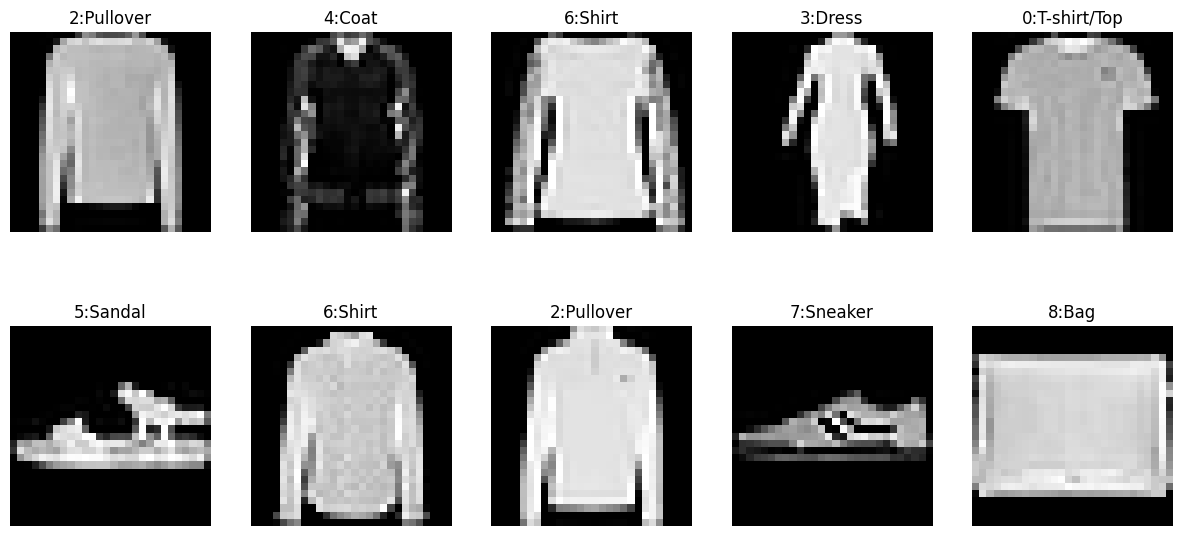

In [27]:
np.random.seed(0)
fig, ax = plt.subplots(2, 5, figsize=(15, 7))
sample_idxs = np.random.randint(0, 60000, size=10)
sample_images, sample_labels = train_images_array[sample_idxs], train_labels_array[sample_idxs]
img_num = 0
for row in range(2):
  for col in range(5):
    ax[row, col].imshow(sample_images[img_num], cmap='gray')
    ax[row, col].set_title(str(sample_labels[img_num])+':'+str(output_mapping[sample_labels[img_num]]))
    ax[row, col].axis('off')
    img_num += 1
plt.show()

## Using Logistic Regression

In [29]:
X_train, y_train = train_images_array.reshape(train_images_array.shape[0], train_images_array.shape[1]*train_images_array.shape[2]), train_labels_array
X_test, y_test = test_images_array.reshape(test_images_array.shape[0], test_images_array.shape[1]*test_images_array.shape[2]), test_labels_array
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [32]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
train_acc = accuracy_score(y_true=y_train, y_pred=log_reg.predict(X_train))
test_acc = accuracy_score(y_true=y_test, y_pred=log_reg.predict(X_test))
train_acc, test_acc

(0.8632, 0.8412)

# Classification using Simple Linear Neural Network

## Imports

In [34]:
import pandas as pd
import numpy as np
from torchvision.datasets import FashionMNIST
import PIL
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

## Dataset